In [ ]:
# 安装与配置
!pip install numpy matplotlib scipy
# 我的微信：cvnlpoochat 


Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [ ]:
# 常微分方程（ODE）求解器

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
# 编程函数方法参考：https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html


In [50]:
# 任务 1：种群模型
# 再生数 sigma
sigma = 3
# 初始值 s0、i0 和 r0
s0 = 0.99
i0 = 0.01
r0 = 0


def rhs_SIR(t, y):
    prod = np.einsum("ij, j... -> i...",
                     sigma * np.array([[-1], [1]]),
                     np.prod(y, axis=0, keepdims=True))
    add_i = np.einsum("ij, j... -> i...",
                      np.array([[0, 0], [0, -1]]),
                      y)
    # dsdt = ...（易感者变化率）
    # didt = ...（感染者变化率）
    return prod + add_i


    

# np.einsum基于爱因斯坦求和约定（Einstein summation convention）对数组进行操作。它能够简洁地表达复杂的数组运算（如矩阵乘法、转置、求和、点积等），同时往往比传统方法更高效。

"ij, j... -> i..."
第一个输入数组的维度为 (i, j)（即 2 维矩阵，i 为行维度，j 为列维度）。
第二个输入数组的维度为 (j, ...)（j 为第一个维度，... 表示后续的任意个批量维度，例如 (j, k)、j, m, n) 等

In [51]:
# 案例
import numpy as np
a = np.array([1, 2, 3])

# 对所有元素求和（省略下标，默认对所有维度求和）
print(np.einsum('i->', a))  # 输出：6（等价于 np.sum(a)）


a = np.array([[1, 2], [3, 4]])

# 交换下标 i 和 j，实现转置
print(np.einsum('ij->ji', a))
# 输出：
# [[1 3]
#  [2 4]]


a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])

# 矩阵乘法：C_ij = sum_k A_ik * B_kj（k 在下标中出现但未在输出中出现，故求和）
print(np.einsum('ik,kj->ij', a, b))
# 输出：
# [[19 22]
#  [43 50]]（等价于 a @ b）




6
[[1 3]
 [2 4]]
[[19 22]
 [43 50]]


In [52]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

# 向量点积：sum_i a_i * b_i（i 被求和）
print(np.einsum('i,i->', a, b))  # 输出：32（等价于 np.dot(a, b)）

32


In [53]:
a = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])  # 形状 (2, 2, 2)

# 对第二个轴（j）求和，保留 i 和 k
print(np.einsum('ijk->ik', a))
# 输出：
# [[ 4  6]  （1+3=4，2+4=6）
#  [12 14]] （5+7=12，6+8=14）

[[ 4  6]
 [12 14]]


# 问题：该函数求解微分方程时默认使用哪种方法？t_eval参数的作用是什么？积分器总共执行了多少个时间步？这与函数调用次数（即导数计算次数）有何关系？

In [54]:
# 默认情况下，求解器使用RK45方法（龙格 - 库塔 45 法）
t_eval = np.linspace(0, 21, 101)
print(f"时间点数：{len(t_eval)}")
print(f"时间：{t_eval}")
sol = scipy.integrate.solve_ivp(fun=rhs_SIR, t_span=[0, 21],
y0=np.array([s0, i0]), t_eval=t_eval)
print(f"Anzahl an f Auswertungen: {sol.nfev}")
print(f"函数调用次数（导数计算次数）：{sol.nfev}")

时间点数：101
时间：[ 0.    0.21  0.42  0.63  0.84  1.05  1.26  1.47  1.68  1.89  2.1   2.31
  2.52  2.73  2.94  3.15  3.36  3.57  3.78  3.99  4.2   4.41  4.62  4.83
  5.04  5.25  5.46  5.67  5.88  6.09  6.3   6.51  6.72  6.93  7.14  7.35
  7.56  7.77  7.98  8.19  8.4   8.61  8.82  9.03  9.24  9.45  9.66  9.87
 10.08 10.29 10.5  10.71 10.92 11.13 11.34 11.55 11.76 11.97 12.18 12.39
 12.6  12.81 13.02 13.23 13.44 13.65 13.86 14.07 14.28 14.49 14.7  14.91
 15.12 15.33 15.54 15.75 15.96 16.17 16.38 16.59 16.8  17.01 17.22 17.43
 17.64 17.85 18.06 18.27 18.48 18.69 18.9  19.11 19.32 19.53 19.74 19.95
 20.16 20.37 20.58 20.79 21.  ]
Anzahl an f Auswertungen: 116
函数调用次数（导数计算次数）：116


In [55]:
# 案例
import scipy.integrate as spi
import numpy as np

# 定义一个简单的微分方程（例如：y' = -y）
def rhs(t, y):
    return -y

# 初始条件和时间区间
y0 = [1.0]
t_span = (0, 10)

# 1. 隐式使用默认方法（理论上应为RK45）
sol_default = spi.solve_ivp(rhs, t_span, y0)
print("默认方法的求解器信息：")
print(f"是否使用RK45？通过文档可知默认方法为RK45")

# 2. 显式指定method="RK45"
sol_rk45 = spi.solve_ivp(rhs, t_span, y0, method="RK45")
print("\n显式指定RK45的求解结果：")
print(f"求解成功：{sol_rk45.success}")  # 若成功，说明方法有效
print(f"时间步数量：{len(sol_rk45.t)}")  # RK45的步长特性可辅助验证

# 3. 对比默认方法与显式指定RK45的结果（应完全一致）
print("\n默认方法与显式RK45的结果是否一致？", 
      np.allclose(sol_default.y, sol_rk45.y))  # 输出True则确认

# 时间步数量 = 求解器返回的时间点总数 - 1

默认方法的求解器信息：
是否使用RK45？通过文档可知默认方法为RK45

显式指定RK45的求解结果：
求解成功：True
时间步数量：13

默认方法与显式RK45的结果是否一致？ True


In [56]:
# sol
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  2.100e-01 ...  2.079e+01  2.100e+01]
        y: [[ 9.900e-01  9.823e-01 ...  5.838e-02  5.838e-02]
            [ 1.000e-02  1.509e-02 ...  3.198e-07  2.689e-07]]
      sol: None
 t_events: None
 y_events: None
     nfev: 116
     njev: 0
      nlu: 0

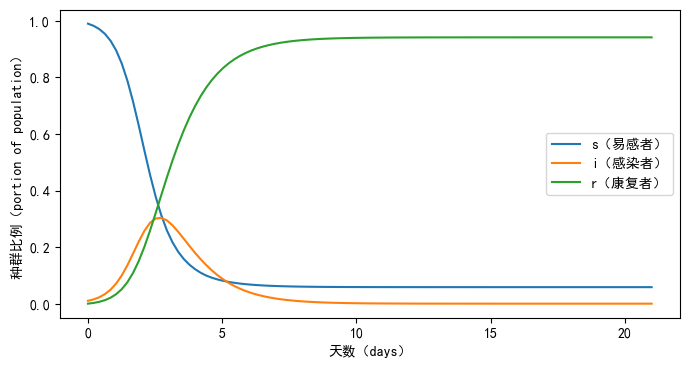

In [57]:
import matplotlib.pyplot as plt
# 绘制 SIR 模型的相图，需同时可视化系统动力学的方向场和若干示例轨迹。
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 

s = sol.y[0, :]  # 提取s(t)的解
i = sol.y[1, :]  # 提取i(t)的解
r = np.ones_like(s) - s - i  # 计算r(t)的解（康复者比例）
# 分别绘制S(t)、I(t)和R(t)的变化曲线
fig = plt.figure(figsize=(8, 4))
plt.xlabel("天数（days）")
plt.ylabel("种群比例（portion of population）")
plt.plot(t_eval, s, label="s（易感者）")
plt.plot(t_eval, i, label="i（感染者）")
plt.plot(t_eval, r, label="r（康复者）")
plt.legend(loc="right")  # 图例放在右侧
plt.show()

# 针对不同的初始值，计算\((s, i)\)平面上的解轨迹，并绘制这些轨迹。


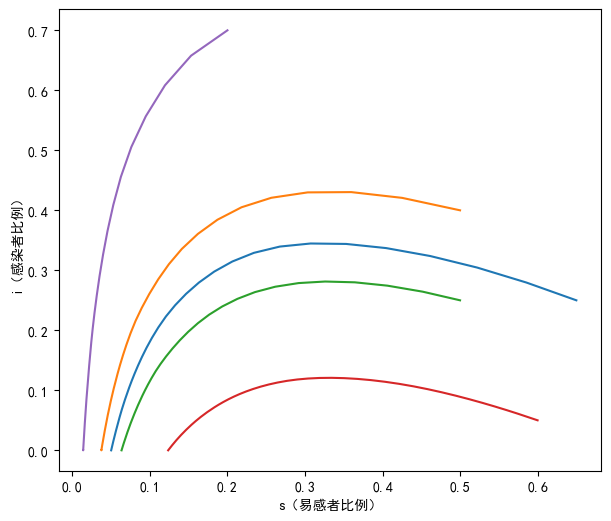

In [58]:
# 定义不同的初始值组合，用于计算轨迹
s0s = [0.65, 0.5, 0.5, 0.6, 0.2]  # 不同的s初始值
i0s = [0.25, 0.4, 0.25, 0.05, 0.7]  # 不同的i初始值
t_eval = np.linspace(0, 21, 161)  # 时间点（用于更平滑的轨迹）
# 创建相图
plt.figure(11, figsize=(7, 6))

def plot_trajectories():
    plt.xlabel("s（易感者比例）")
    plt.ylabel("i（感染者比例）")
    # 遍历所有初始值组合，计算并绘制轨迹
    for (s0, i0) in zip(s0s, i0s):
        sol = scipy.integrate.solve_ivp(fun=rhs_SIR, t_span=[0, 21],
                                        y0=np.array([s0, i0]), t_eval=t_eval)
        s = sol.y[0, :]
        i = sol.y[1, :]
        r = np.ones_like(s) - s - i  # 可忽略，仅需s和i绘制相轨迹
        plt.plot(s, i)  # 绘制(s, i)平面上的轨迹

plot_trajectories()
plt.show()

#  5 条不同的解轨迹，每条轨迹线对应一组初始值\((s_0, i_0)\)的求解结果。

# 每条线代表从不同初始状态出发，系统（疫情传播）的演化路径。
# 通过对比不同轨迹，可以观察初始状态对疫情发展的影响
# （例如，初始感染者比例越高，轨迹的峰值位置和演化速度会不同）。
# 结合方向场（流线图），可以更直观地理解 SIR 模型的整体动力学特性
# （如所有轨迹最终都会趋向于感染结束的稳定状态）。

In [59]:
# 定义网格分辨率
res = 100
# 生成s和i的线性间隔数组
s = np.linspace(0, 1, res)
i = np.linspace(0, 1, res)
# 创建网格（S和I均为(res, res)维度的矩阵）
S, I = np.meshgrid(s, i)
print(S.shape)  # 输出网格维度
print(S)  # 输出网格维度
print(I)  

(100, 100)
[[0.         0.01010101 0.02020202 ... 0.97979798 0.98989899 1.        ]
 [0.         0.01010101 0.02020202 ... 0.97979798 0.98989899 1.        ]
 [0.         0.01010101 0.02020202 ... 0.97979798 0.98989899 1.        ]
 ...
 [0.         0.01010101 0.02020202 ... 0.97979798 0.98989899 1.        ]
 [0.         0.01010101 0.02020202 ... 0.97979798 0.98989899 1.        ]
 [0.         0.01010101 0.02020202 ... 0.97979798 0.98989899 1.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.01010101 0.01010101 0.01010101 ... 0.01010101 0.01010101 0.01010101]
 [0.02020202 0.02020202 0.02020202 ... 0.02020202 0.02020202 0.02020202]
 ...
 [0.97979798 0.97979798 0.97979798 ... 0.97979798 0.97979798 0.97979798]
 [0.98989899 0.98989899 0.98989899 ... 0.98989899 0.98989899 0.98989899]
 [1.         1.         1.         ... 1.         1.         1.        ]]


In [60]:
# 在以上定义好的网格上计算方向场\(ds/dt\)和\(di/dt\)（即各网格点的导数向量）。
# 初始化ds/dt和di/dt数组
t = 0  # 由于SIR模型是自治系统（不含显式时间t），此处t可取任意值
# 计算所有网格点的导数（dy为(2, res, res)维度，对应ds/dt和di/dt）
dy = rhs_SIR(t, np.stack((S, I), axis=0))
# 提取ds/dt和di/dt（分别对应dy的第0维和第1维）
dS = dy[0, :, :]
dI = dy[1, :, :]

# 对所有满足\(s+i>1\)的网格点进行掩码处理（即忽略这些点）。


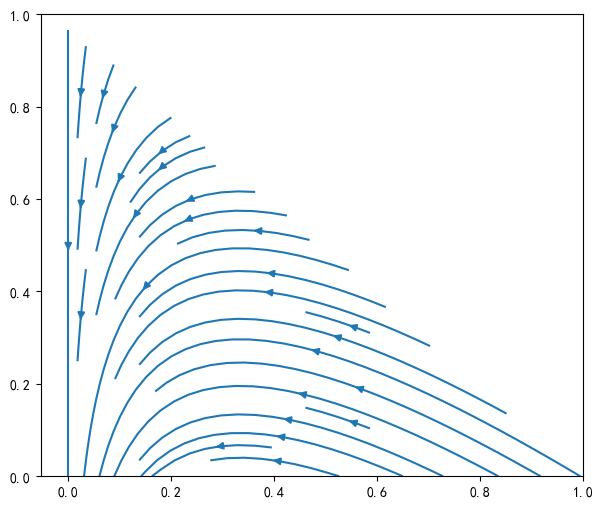

In [61]:
# 创建掩码：筛选出s+i>1的区域
mask = S + I > 1 # 掩码操作
# 应用掩码（被掩码的点将不参与后续绘图）
dS = np.ma.array(dS, mask=mask)
dI = np.ma.array(dI, mask=mask)
# 创建相图（仅方向场）
plt.figure(figsize=(7, 6))
plt.streamplot(s, i, dS, dI)  # 绘制流线图（方向场）
plt.show() # 在相图中额外绘制不同初始值对应的解轨迹。

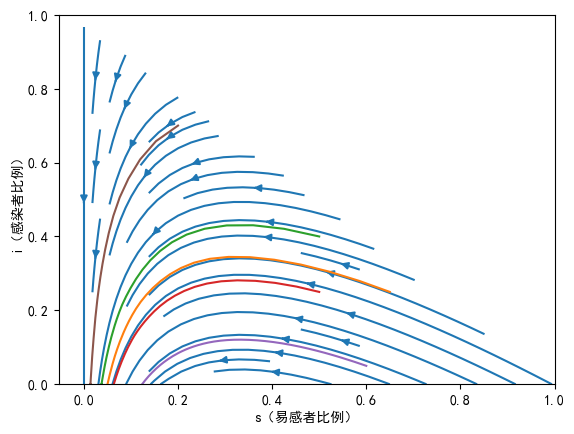

In [62]:
plt.figure(11)  # 复用之前的图编号，确保轨迹与方向场在同一图中
plt.streamplot(s, i, dS, dI)  # 先绘制方向场
plot_trajectories()  # 再绘制解轨迹
plt.show()

# 务 2 - 范德波尔方程（van-der-Pol Equation）
![alt text](image.png)
其中：
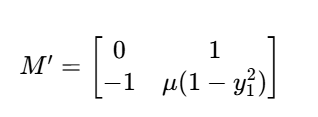

In [63]:
mu = 2  # 设置参数mu的值
# 定义范德波尔方程的右侧函数（使用lambda表达式简化）
rhs_vdP = lambda t, y: [c := np.transpose(np.squeeze(
    np.matmul(
        [np.place(a := np.tile(np.array([[0, 1], [-1, 0]], dtype=np.float64),
                                (y.shape[1] if len(y.shape) > 1 else 1, 1, 1)),
                  np.tile(np.array([[False, False], [False, True]]),
                          (y.shape[1] if len(y.shape) > 1 else 1, 1, 1)),
                  mu * (1 - y[0, ...]**2)), a][1],
        np.transpose(y)[:, :, np.newaxis] if y.ndim == 2 else y[np.newaxis, :, np.newaxis]), axis=2)),
                        np.squeeze(c, axis=1) if len(y.shape) == 1 else c][1]
# 测试函数：输入t=5，y=[0,1]，应返回array([1, 2])
rhs_vdP(5, np.array([0, 1]))

array([1., 2.])

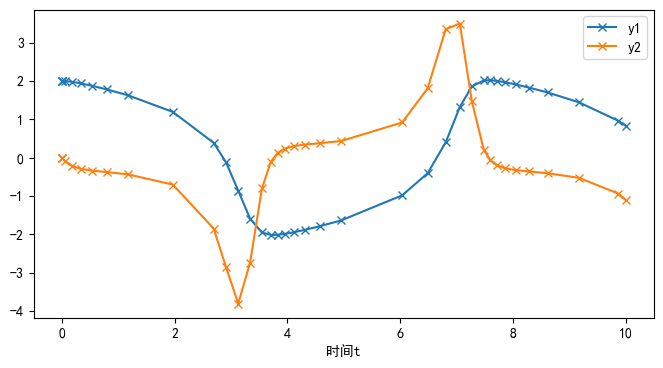

In [65]:
t_span = (0, 10)  # 时间区间
y0 = np.array([2, 0])  # 初始值
# 求解范德波尔方程

# 展示解\(y_1\)和\(y_2\)随时间的变化趋势，要求使用不同的标记（marker）以显示求解器的各个时间步。
sol = scipy.integrate.solve_ivp(fun=rhs_vdP, t_span=t_span, y0=y0)


y1 = sol.y[0, :]  # 提取y1的解
y2 = sol.y[1, :]  # 提取y2的解
# 创建图形
fig = plt.figure(figsize=(8, 4))
plt.xlabel("时间t")
# 绘制y1和y2的曲线，使用"x"标记显示时间步
plt.plot(sol.t, y1, "x", linestyle="-", label="y1")
plt.plot(sol.t, y2, "x", linestyle="-", label="y2")
plt.legend()  # 添加图例
plt.show()

RK45：显式龙格 - 库塔方法（explizites Runge-Kutta-Verfahren），含 6 个计算步，精度阶数为 5；步长控制采用嵌入的 7 步 4 阶方法（eingebettetes Verfahren mit 7 Stufen und Ordnung 4）。

DOP853：显式龙格 - 库塔方法，含 12 个计算步，精度阶数为 8；步长控制采用 2 个嵌入方法。
Radau：基于 Radau 求积公式（Radau-Quadraturformel）的配置方法（Kollokationsverfahren），含 3 个计算步，精度阶数为 5，等价于 3 步 5 阶隐式龙格 - 库塔方法（implizites Runge-Kutta-Verfahren）。

BDF：隐式向后差分公式方法（implizites BDF-Verfahren，BDF 即 Backward Difference Formula），精度阶数可在 1 至 5 之间变化（variabler Ordnung 1 bis 5）。


# 步长特点（Schrittweite）

由于参数 μ=2，该常微分方程（DGL）不属于刚性方程（nicht steif），因此显式方法也能很好地工作。
DOP853 的步长数量最少，这符合预期，因为它的精度阶数最高。
RK45 和 Radau 的精度阶数均为 5，但 Radau 的步长数量更多；这可能是因为 Radau 的步长控制采用 3 阶嵌入方法，而 RK45 采用 4 阶嵌入方法，导致 Radau 对局部误差（lokaler Fehler）的估计通常更大。

BDF 的步长数量最多，可能是因为其实现中为简化计算，会尽量长时间采用恒定步长（konstante Schrittweite）。

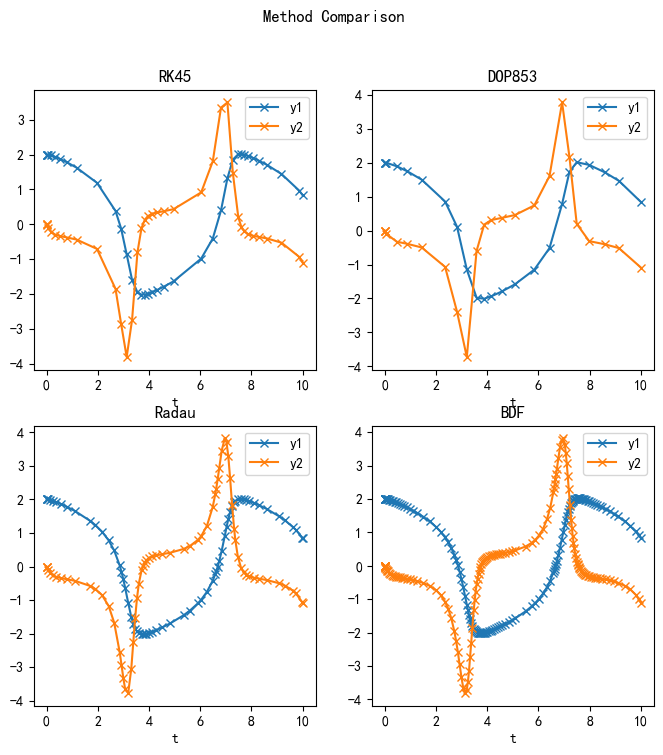

In [67]:
# 分别用四种方法求解
sol_RK45 = scipy.integrate.solve_ivp(fun=rhs_vdP, t_span=t_span, y0=y0, method="RK45")
sol_DOP853 = scipy.integrate.solve_ivp(fun=rhs_vdP, t_span=t_span, y0=y0, method="DOP853")
sol_Radau = scipy.integrate.solve_ivp(fun=rhs_vdP, t_span=t_span, y0=y0, method="Radau", vectorized=True)
sol_BDF = scipy.integrate.solve_ivp(fun=rhs_vdP, t_span=t_span, y0=y0, method="BDF", vectorized=True)

# 创建2行2列的子图布局
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8))
fig.suptitle("Method Comparison")  # 总标题（方法对比）

# 绘制RK45方法的结果
ax1.set_title("RK45")  # 子图标题
ax1.set_xlabel("t")  # x轴标签
ax1.plot(sol_RK45.t, sol_RK45.y[0, :], "x", linestyle="-", label="y1")
ax1.plot(sol_RK45.t, sol_RK45.y[1, :], "x", linestyle="-", label="y2")
ax1.legend()  # 显示图例

# 绘制DOP853方法的结果
ax2.set_title("DOP853")
ax2.set_xlabel("t")
ax2.plot(sol_DOP853.t, sol_DOP853.y[0, :], "x", linestyle="-", label="y1")
ax2.plot(sol_DOP853.t, sol_DOP853.y[1, :], "x", linestyle="-", label="y2")
ax2.legend()

# 绘制Radau方法的结果
ax3.set_title("Radau")
ax3.set_xlabel("t")
ax3.plot(sol_Radau.t, sol_Radau.y[0, :], "x", linestyle="-", label="y1")
ax3.plot(sol_Radau.t, sol_Radau.y[1, :], "x", linestyle="-", label="y2")
ax3.legend()

# 绘制BDF方法的结果
ax4.set_title("BDF")
ax4.set_xlabel("t")
ax4.plot(sol_BDF.t, sol_BDF.y[0, :], "x", linestyle="-", label="y1")
ax4.plot(sol_BDF.t, sol_BDF.y[1, :], "x", linestyle="-", label="y2")
ax4.legend()

plt.show()  # 显示图像

当 μ=100、时间区间\(t \in [0,400]\)时，绝对误差容限（atol）和相对误差容限（rtol）的选择对范德波尔方程解的影响。
对比两种误差容限设置的解：
场景 A（低精度，niedrige Genauigkeit）：rtol=1e-1，atol=1e-1
场景 B（高精度，hohe Genauigkeit）：rtol=1e-8，atol=1e-10

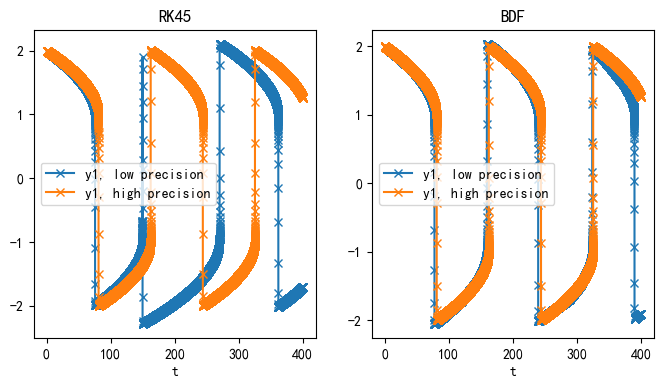

In [68]:
# 范德波尔方程参数设置
mu = 100
# 初始条件
y0 = np.array([2, 0])
# 时间区间
t_span = (0, 400)
# 生成密集的时间点用于输出（80000个点，确保曲线平滑）
t_eval = np.linspace(t_span[0], t_span[1], 80000)

# 定义范德波尔方程的右侧导数函数（lambda表达式）
rhs_vdP = lambda t, y: [
    c := np.transpose(np.squeeze(
        np.matmul(
            # 构造含非线性项的矩阵
            [np.place(
                a := np.tile(np.array([[0, 1], [-1, 0]], dtype=np.float64),
                            (y.shape[1] if len(y.shape) > 1 else 1, 1, 1)),  # 扩展矩阵以支持批量计算
                np.tile(np.array([[False, False], [False, True]]),
                        (y.shape[1] if len(y.shape) > 1 else 1, 1, 1)),  # 掩码：仅替换右下角元素
                mu * (1 - y[0, ...]**2)  # 替换值：范德波尔方程的非线性项
            ), a][1],
            # 调整y的维度以匹配矩阵乘法
            np.transpose(y)[:, :, np.newaxis] if y.ndim == 2 else y[np.newaxis, :, np.newaxis]
        ), axis=2)  # 去除多余维度
    ),
    # 调整输出维度：若输入y为1维，输出也为1维；否则为2维
    np.squeeze(c, axis=1) if len(y.shape) == 1 else c
][1]

# 场景A：低精度求解（RK45方法）
sol_lo = scipy.integrate.solve_ivp(fun=rhs_vdP, t_span=t_span, y0=y0,
                                  t_eval=t_eval, method="RK45",
                                  atol=1e-1, rtol=1e-1)

# 场景A：低精度求解（BDF方法）
sol_lo_BDF = scipy.integrate.solve_ivp(fun=rhs_vdP, t_span=t_span, y0=y0,
                                       t_eval=t_eval, method="BDF",
                                       vectorized=True, atol=1e-1, rtol=1e-1)

# 场景B：高精度求解（RK45方法）
sol_hi = scipy.integrate.solve_ivp(fun=rhs_vdP, t_span=t_span, y0=y0,
                                  t_eval=t_eval, method="RK45",
                                  atol=1e-10, rtol=1e-8)

# 场景B：高精度求解（BDF方法）
sol_hi_BDF = scipy.integrate.solve_ivp(fun=rhs_vdP, t_span=t_span, y0=y0,
                                       t_eval=t_eval, method="BDF",
                                       vectorized=True, atol=1e-10, rtol=1e-8)

# 绘制两种场景的对比图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))  # 1行2列子图

# 左子图：RK45方法的结果对比
ax1.set_title("RK45")
ax1.set_xlabel("t")
ax1.plot(t_eval, sol_lo.y[0, :], "x", linestyle="-", label="y1, low precision")  # 低精度y₁
ax1.plot(t_eval, sol_hi.y[0, :], "x", linestyle="-", label="y1, high precision")  # 高精度y₁
ax1.legend()

# 右子图：BDF方法的结果对比
ax2.set_title("BDF")
ax2.set_xlabel("t")
ax2.plot(t_eval, sol_lo_BDF.y[0, :], "x", linestyle="-", label="y1, low precision")  # 低精度y₁
ax2.plot(t_eval, sol_hi_BDF.y[0, :], "x", linestyle="-", label="y1, high precision")  # 高精度y₁
ax2.legend()

plt.show()

d:\anaconda3\Lib\site-packages\scipy\integrate\_ivp\ivp.py:621: UserWarning: The following arguments have no effect for a chosen solver: `jac`.
  solver = method(fun, t0, y0, tf, vectorized=vectorized, **options)
d:\anaconda3\Lib\site-packages\scipy\integrate\_ivp\rk.py:505: UserWarning: The following arguments have no effect for a chosen solver: `jac`.
  super().__init__(fun, t0, y0, t_bound, max_step, rtol, atol,


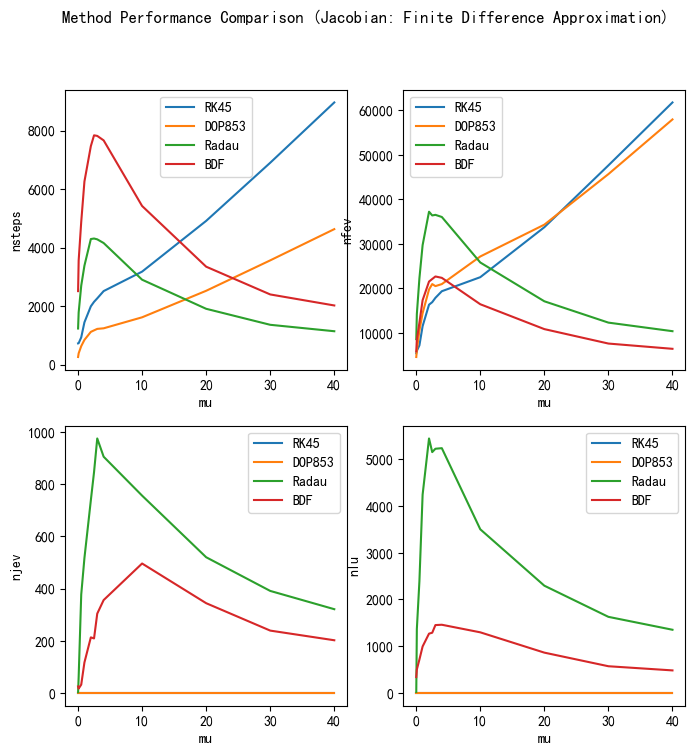

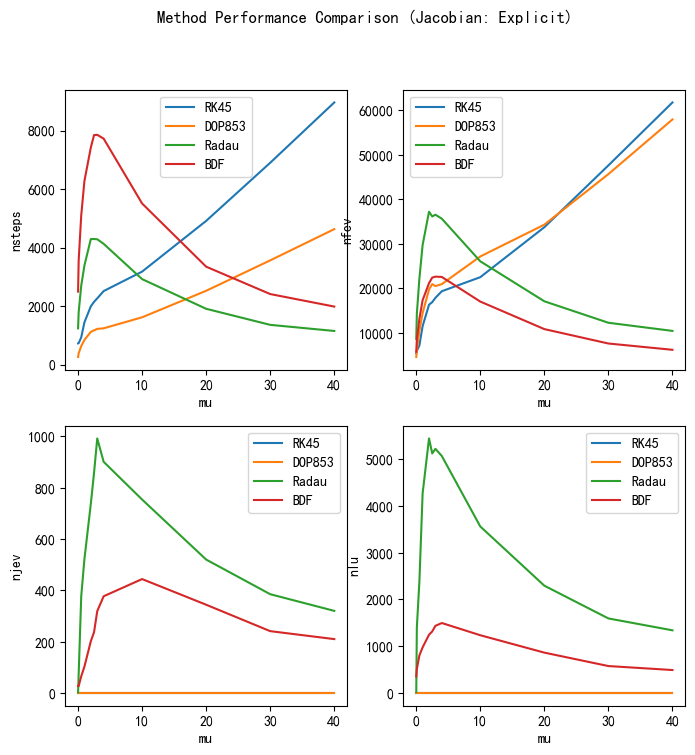

In [69]:
# 待测试的μ值列表
mus = np.array([0.01, 0.1, 0.5, 1.0, 2.0, 2.5, 3.0, 4.0, 10.0, 20.0, 30.0, 40.0])
# 初始化存储结果的数组（4种方法×12个μ值）
nsteps = np.zeros((4, len(mus)))  # 时间步长数量
nfevs = np.zeros((4, len(mus)))   # 右侧函数调用次数（nfev）
njevs = np.zeros((4, len(mus)))   # 雅可比矩阵调用次数（njev）
nlus = np.zeros((4, len(mus)))    # LU分解次数（nlu）

# 定义范德波尔方程的右侧导数函数（含μ参数）
rhs_vdP = lambda t, y, mu: [
    c := np.transpose(np.squeeze(
        np.matmul(
            [np.place(
                a := np.tile(np.array([[0, 1], [-1, 0]], dtype=np.float64),
                            (y.shape[1] if len(y.shape) > 1 else 1, 1, 1)),
                np.tile(np.array([[False, False], [False, True]]),
                        (y.shape[1] if len(y.shape) > 1 else 1, 1, 1)),
                mu * (1 - y[0, ...]**2)
            ), a][1],
            np.transpose(y)[:, :, np.newaxis] if y.ndim == 2 else y[np.newaxis, :, np.newaxis]
        ), axis=2)
    ),
    np.squeeze(c, axis=1) if len(y.shape) == 1 else c
][1]

# 定义范德波尔方程的精确雅可比矩阵
jac = lambda t, y, mu: np.array([
    [0, 1],  # 雅可比矩阵第一行（∂(y₁')/∂y₁, ∂(y₁')/∂y₂）
    [-2 * mu * y[0] * y[1] - 1, mu * (1 - y[0]**2)]  # 第二行（∂(y₂')/∂y₁, ∂(y₂')/∂y₂）
])

# 定义方法性能对比函数（可选择是否传入雅可比矩阵）
def method_performance_comparison(jac=None):
    methods = ["RK45", "DOP853", "Radau", "BDF"]  # 四种方法
    for i, method in enumerate(methods):  # 遍历方法
        for j, mu in enumerate(mus):  # 遍历μ值
            # 求解常微分方程
            sol = scipy.integrate.solve_ivp(
                fun=lambda t, y: rhs_vdP(t, y, mu),  # 包装导数函数（固定μ）
                t_span=t_span,
                y0=y0,
                method=method,
                vectorized=i > 1 and jac == None,  # 仅Radau/BDF在无雅可比时启用向量化
                atol=1e-7,
                rtol=1e-4,
                jac=None if jac == None else lambda t, y: jac(t, y, mu)  # 传入雅可比矩阵（若有）
            )
            # 存储结果：步长数量=时间点数量-1（初始时间t0不计入步长）
            nsteps[i, j] = len(sol.t) - 1
            nfevs[i, j] = sol.nfev    # 右侧函数调用次数
            njevs[i, j] = sol.njev    # 雅可比矩阵调用次数
            nlus[i, j] = sol.nlu      # LU分解次数
                # 绘制结果图像（2行2列子图）
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))
    ((ax_nsteps, ax_nfev), (ax_njev, ax_nlu)) = axs  # 分配子图：步长数、函数调用数、雅可比调用数、LU分解数
    # 总标题（区分雅可比矩阵类型：有限差分近似/精确）
    fig.suptitle(f"Method Performance Comparison (Jacobian: {'Finite Difference Approximation' if jac == None else 'Explicit'})")
    
    # 为所有子图设置x轴标签（μ值）
    for ax1 in axs:
        for ax in ax1:
            ax.set_xlabel("mu")
    # 设置y轴标签
    ax_nsteps.set_ylabel("nsteps")  # 时间步长数量
    ax_nfev.set_ylabel("nfev")      # 右侧函数调用次数
    ax_njev.set_ylabel("njev")      # 雅可比矩阵调用次数
    ax_nlu.set_ylabel("nlu")        # LU分解次数
    
    # 为每种方法绘制曲线
    for i, method in enumerate(methods):
        ax_nsteps.plot(mus, nsteps[i, :], "-", label=method)
        ax_nfev.plot(mus, nfevs[i, :], "-", label=method)
        ax_njev.plot(mus, njevs[i, :], "-", label=method)
        ax_nlu.plot(mus, nlus[i, :], "-", label=method)
    
    # 所有子图显示图例
    for ax1 in axs:
        for ax in ax1:
            ax.legend()
    plt.show()

# 调用函数：1. 不传入雅可比（使用有限差分近似）
method_performance_comparison()
# 调用函数：2. 传入精确雅可比矩阵
method_performance_comparison(jac=jac)